# Support Vector Machine

Support vector machine is an algorithm to classify data. The line that separates the data into two subsets will obtain the greatest __margin__.To maximize __margin__, a constrained optimization problem is used. If we strictly impose that all instances be off the _street_, this is called __hard margin classification__. There are two issues with __hard margin classification__: (1) it works if the data is linearly separable (2) it is quite sensitive to outliers. To avoid this issue, it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limitting the margin violations. This is called __soft margin classification__.

In __ScikitLearn's SVM__ classes, you can control __margin violations__ using the $C$ hyperparameter: a value leads to a wider street but more margin violations.

In [21]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
rc('text', usetex = True)
rc('font', family='serif')

iris = datasets.load_iris()
X = iris ['data'][:, (2, 3)]
y = (iris ['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scalar', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [22]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## Non-linear SVM Classification

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being separable. One approach is to add more features such as polynomial features. To implement this, you can create a __Pipeline__ containing a __PolynomialFeatures__ transformer, followed by a __StandardScaler__ and a __LinearSVC__. 

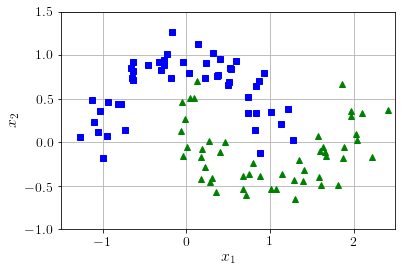

In [26]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

plot_dataset(X, y, [-1.5, 2.5, -1., 1.5])
plt.show()

In [27]:
polynomial_svm_clf = Pipeline(
[
    ('ply_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, max_iter = 2000, loss='hinge', random_state=42))
]
)

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('ply_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=2000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

However, PolynomialFeatures cannot deal with very complex datasets and with high polynomial degree it creates a huge number of features, making the model too slow. Fortunately, when using __SVM__, you can apply an almost miraculous mathematical technique called __kernel trick__.

In [28]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline(
[
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5)) # coef0 controls how much you model is influenced with high-degree polynomials
]
)

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

Kernel function projects the data into a greater space so that the data can be distinguished well. It is like mapping data into a function $\phi$ and works as follows: $\phi: x \rightarrow \phi(x)$ One kernel is called __Gaussian RBF (Radial Basis Function) Kernel__ which is $K(x, l) = e^{-\frac{\|x - l\|^2}{2\sigma^2}}$, where $\|x - l\|^2$ shows the distance of an instance $x$ from a landmark $l$. We need to find some landmarks and measure the similarity function Gaussian, and then create a feature for each landmark. Then, we will have a good chance to separate the data.

## Gaussian RBF Kernel

In [29]:
rbf_kernel_svm_clf = Pipeline(
[
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001)),
]
)

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Other kernels exist but used rarely. For example, __String Kernels__ can be used to classify text documents or DNA sequences. __LinearSVC__ is much faster than __SVC__ but it does not support kernels. It runs in $O(m \times n)$ while __SVC__ runs in $O(m^2 \times n) to O(m^3 \times n)$. 

## SVM Regression

The SVM algorithm is quite versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression. The trick is to reverse the objective. Instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM regression tries to fit as many instances as possible on the street while limiting margin violations. The width of the street is controlled by a hyperparameter $\epsilon$. For this purpose, we can use Scikit-Learn's LinearSVR class to perform SVM Regression. 

In [30]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

To tackle nonlinear regression tasks, we can use a kernalized SVM model.

In [31]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

C:\Users\vas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:194: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)